In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [48]:
import pandas as pd
import glob

path = 'Charanka Solar Park, Gujarat (Raw Data)' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0,skiprows=2,usecols=[0,1,2,3,4,19])
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [49]:
frame['Date']=frame['Year'].astype(str) + frame['Month'].astype(str).str.zfill(2) + frame['Day'].astype(str).str.zfill(2) + frame['Hour'].astype(str).str.zfill(2)+frame['Minute'].astype(str)

frame['Date'] = pd.to_datetime(frame['Date'], format='%Y%m%d%H%M')

In [50]:
frame.head()

,Year,Month,Day,Hour,Minute,Wind Speed,Date
0,2009,1,1,0,30,3.331976,2009-01-01 00:30:00
1,2009,1,1,1,30,3.340718,2009-01-01 01:30:00
2,2009,1,1,2,30,3.397724,2009-01-01 02:30:00
3,2009,1,1,3,30,3.411735,2009-01-01 03:30:00
4,2009,1,1,4,30,3.317603,2009-01-01 04:30:00


In [51]:
df_all = frame[['Date','Wind Speed']]

In [52]:
df_all.head()

,Date,Wind Speed
0,2009-01-01 00:30:00,3.331976
1,2009-01-01 01:30:00,3.340718
2,2009-01-01 02:30:00,3.397724
3,2009-01-01 03:30:00,3.411735
4,2009-01-01 04:30:00,3.317603


In [53]:
df_all.sort_values("Date", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 

In [54]:
df_all.tail()

,Date,Wind Speed
70099,2011-12-31 19:30:00,4.749740
70100,2011-12-31 20:30:00,4.857658
70101,2011-12-31 21:30:00,4.899503
70102,2011-12-31 22:30:00,4.937514
70103,2011-12-31 23:30:00,4.960580


In [55]:
df_all.set_index('Date',inplace=True)

In [56]:
df_all.index

DatetimeIndex(['2000-01-01 00:30:00', '2000-01-01 01:30:00',
               '2000-01-01 02:30:00', '2000-01-01 03:30:00',
               '2000-01-01 04:30:00', '2000-01-01 05:30:00',
               '2000-01-01 06:30:00', '2000-01-01 07:30:00',
               '2000-01-01 08:30:00', '2000-01-01 09:30:00',
               ...
               '2011-12-31 14:30:00', '2011-12-31 15:30:00',
               '2011-12-31 16:30:00', '2011-12-31 17:30:00',
               '2011-12-31 18:30:00', '2011-12-31 19:30:00',
               '2011-12-31 20:30:00', '2011-12-31 21:30:00',
               '2011-12-31 22:30:00', '2011-12-31 23:30:00'],
              dtype='datetime64[ns]', name='Date', length=105192, freq=None)

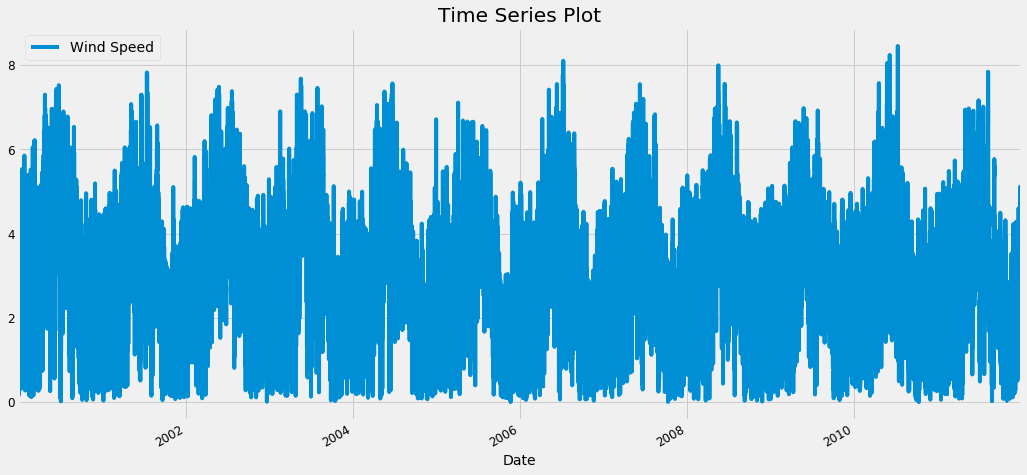

In [57]:
df_all.plot(figsize=[16,8],title='Time Series Plot')

In [58]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [59]:
df_all.fillna(df_all.mean(),inplace=True)

In [60]:
df_all['Wind Speed'].unique()

array([3.73679805, 3.70278907, 3.61409473, ..., 4.89950323, 4.93751383,
       4.96058035])

In [61]:
y=df_all['Wind Speed'].resample('W-MON').mean()

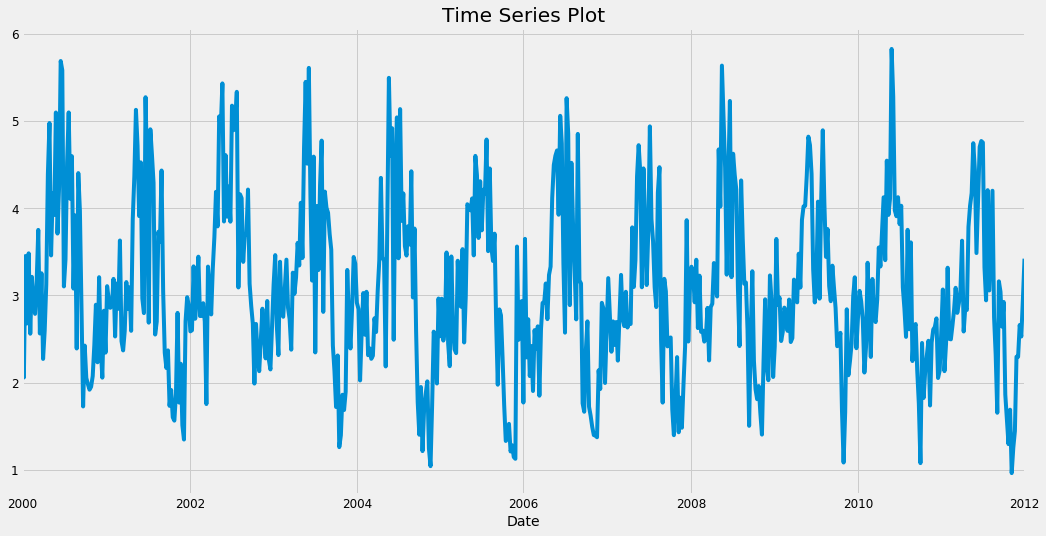

In [62]:
y.plot(figsize=[16,8],title='Time Series Plot')

In [63]:
result=seasonal_decompose(y,model='additive')

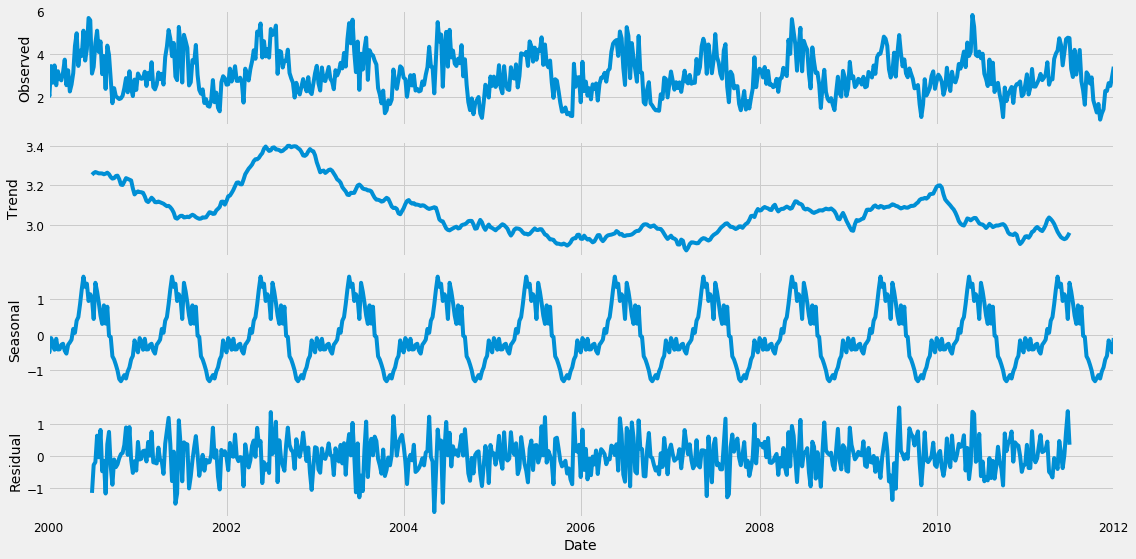

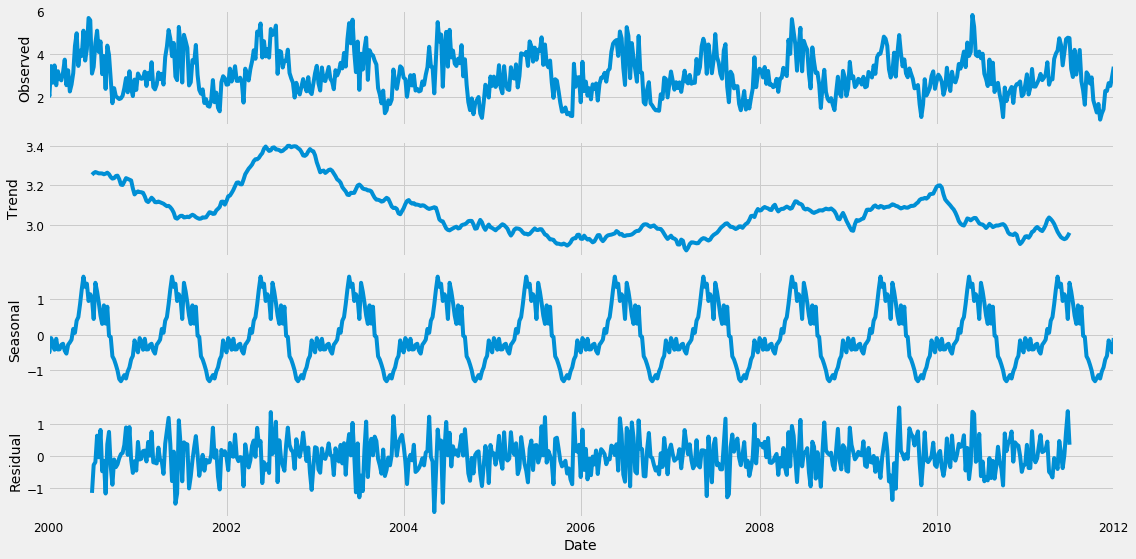

In [64]:
import pylab
pylab.rcParams['figure.figsize'] = (16, 8)
result.plot()

In [42]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 52)
SARIMAX: (0, 0, 1) x (0, 1, 0, 52)
SARIMAX: (0, 1, 0) x (0, 1, 1, 52)
SARIMAX: (0, 1, 0) x (1, 0, 0, 52)


In [43]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}52 - AIC:{}'.format(param, param_seasonal, results.aic))

ARIMA(0, 0, 0)x(0, 0, 0, 52)52 - AIC:2976.7044134134926
ARIMA(0, 0, 0)x(0, 0, 1, 52)52 - AIC:2226.972009980589
ARIMA(0, 0, 0)x(0, 1, 0, 52)52 - AIC:1225.9542418547253
ARIMA(0, 0, 0)x(0, 1, 1, 52)52 - AIC:879.4418935948108
ARIMA(0, 0, 0)x(1, 0, 0, 52)52 - AIC:1216.4454047987779
ARIMA(0, 0, 0)x(1, 0, 1, 52)52 - AIC:1003.789301258279
ARIMA(0, 0, 0)x(1, 1, 0, 52)52 - AIC:970.36079123293
ARIMA(0, 0, 0)x(1, 1, 1, 52)52 - AIC:908.3879811737369
ARIMA(0, 0, 1)x(0, 0, 0, 52)52 - AIC:2397.1455955062966
ARIMA(0, 0, 1)x(0, 0, 1, 52)52 - AIC:1885.5210761938472
ARIMA(0, 0, 1)x(0, 1, 0, 52)52 - AIC:1219.696784313606
ARIMA(0, 0, 1)x(0, 1, 1, 52)52 - AIC:870.6130620251855
ARIMA(0, 0, 1)x(1, 0, 0, 52)52 - AIC:1211.6290899471082
ARIMA(0, 0, 1)x(1, 0, 1, 52)52 - AIC:995.3189597937178
ARIMA(0, 0, 1)x(1, 1, 0, 52)52 - AIC:967.3214501870004
ARIMA(0, 0, 1)x(1, 1, 1, 52)52 - AIC:898.6251604924904
ARIMA(0, 1, 0)x(0, 0, 0, 52)52 - AIC:1354.7752622663636
ARIMA(0, 1, 0)x(0, 0, 1, 52)52 - AIC:1208.749912411338
ARIMA

/home/ayush/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 52)52 - AIC:1223.7302586299938
ARIMA(1, 0, 0)x(0, 1, 1, 52)52 - AIC:872.3168369023771
ARIMA(1, 0, 0)x(1, 0, 0, 52)52 - AIC:1203.793556807318
ARIMA(1, 0, 0)x(1, 0, 1, 52)52 - AIC:998.7098038695106
ARIMA(1, 0, 0)x(1, 1, 0, 52)52 - AIC:967.0445823681426
ARIMA(1, 0, 0)x(1, 1, 1, 52)52 - AIC:901.8985341569075
ARIMA(1, 0, 1)x(0, 0, 0, 52)52 - AIC:1222.7991887677113
ARIMA(1, 0, 1)x(0, 0, 1, 52)52 - AIC:1076.3055599133327
ARIMA(1, 0, 1)x(0, 1, 0, 52)52 - AIC:1219.9824150878615
ARIMA(1, 0, 1)x(0, 1, 1, 52)52 - AIC:869.8777096437917
ARIMA(1, 0, 1)x(1, 0, 0, 52)52 - AIC:1070.884101906287


/home/ayush/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 52)52 - AIC:1002.3706104684813
ARIMA(1, 0, 1)x(1, 1, 0, 52)52 - AIC:960.4513525836456
ARIMA(1, 0, 1)x(1, 1, 1, 52)52 - AIC:897.531303763297
ARIMA(1, 1, 0)x(0, 0, 0, 52)52 - AIC:1270.4341662865004
ARIMA(1, 1, 0)x(0, 0, 1, 52)52 - AIC:1131.9095275271566
ARIMA(1, 1, 0)x(0, 1, 0, 52)52 - AIC:1442.0099822041634
ARIMA(1, 1, 0)x(0, 1, 1, 52)52 - AIC:1056.2465868173654
ARIMA(1, 1, 0)x(1, 0, 0, 52)52 - AIC:1130.8891230101135
ARIMA(1, 1, 0)x(1, 0, 1, 52)52 - AIC:1132.7954973152243
ARIMA(1, 1, 0)x(1, 1, 0, 52)52 - AIC:1173.7650716226424
ARIMA(1, 1, 0)x(1, 1, 1, 52)52 - AIC:1087.2760541871362
ARIMA(1, 1, 1)x(0, 0, 0, 52)52 - AIC:1219.4107222173225
ARIMA(1, 1, 1)x(0, 0, 1, 52)52 - AIC:1075.7545937845184
ARIMA(1, 1, 1)x(0, 1, 0, 52)52 - AIC:1225.2837520145786
ARIMA(1, 1, 1)x(0, 1, 1, 52)52 - AIC:869.5004687435334
ARIMA(1, 1, 1)x(1, 0, 0, 52)52 - AIC:1069.4914192800723
ARIMA(1, 1, 1)x(1, 0, 1, 52)52 - AIC:992.7949970530823
ARIMA(1, 1, 1)x(1, 1, 0, 52)52 - AIC:970.883240330923

In [65]:
mod = sm.tsa.statespace.SARIMAX(y['2000':'2010'],
                                order=(1, 0, 1),
                                seasonal_order=(0, 1, 1, 52),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4508      0.168     -2.685      0.007      -0.780      -0.122
ma.L1          0.5997      0.149      4.038      0.000       0.309       0.891
ma.S.L52      -0.8955      0.091     -9.807      0.000      -1.074      -0.717
sigma2         0.3314      0.029     11.480      0.000       0.275       0.388


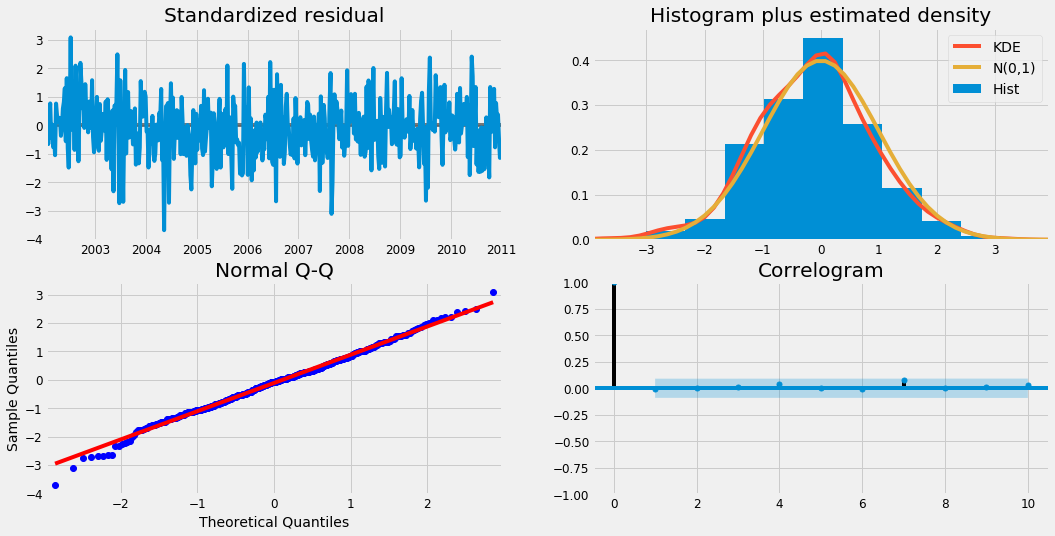

In [45]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

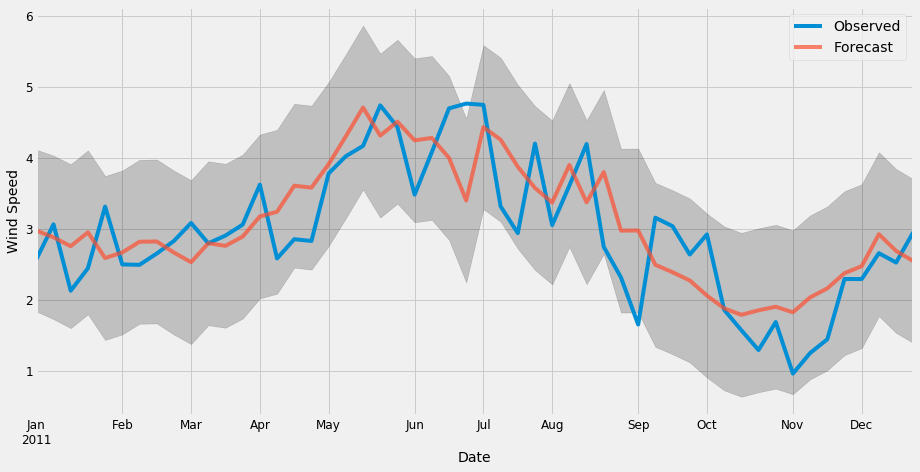

In [72]:
pred = results.get_prediction(start=pd.to_datetime('2011-01-03'),end=pd.to_datetime('2011-12-26'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2011':'2011'].plot(label='Observed')

pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Wind Speed')
plt.legend()
plt.show()

In [73]:
y_forecasted = pred.predicted_mean
y_truth = y['2011-01-03':'2011-12-26']
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.35


In [74]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.59


In [75]:
(abs(y_forecasted - y_truth)/y_truth).mean()

0.19530025683727897

In [76]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(y_truth,y_forecasted)

19.530025683727892

In [77]:
(abs(y_forecasted-y_truth)).mean()

0.4911752067841775

In [78]:
np.sqrt(mse)

0.5879396591051499